In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

Create a graph

In [2]:
embeddings = torch.rand((100, 16), dtype=torch.float) # 100 nodes with 16 embeddings (node features) length

In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

C:\Users\kateb\AppData\Local\Temp/ipykernel_16036/2043223261.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:210.)
  edges = torch.tensor([rows, cols])


In [4]:
edges_attr = np.random.choice(3, 500)

In [5]:
ys = torch.rand((100)).round().long()

Convert the graph to PyG data object

In [6]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [7]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

Visualization

In [8]:
for prop in graph:
    print(prop)

('x', tensor([[0.7999, 0.8448, 0.1097,  ..., 0.2021, 0.3762, 0.0488],
        [0.8362, 0.7160, 0.1362,  ..., 0.7804, 0.7891, 0.7842],
        [0.1145, 0.6649, 0.6914,  ..., 0.4406, 0.0821, 0.1798],
        ...,
        [0.2384, 0.7968, 0.6719,  ..., 0.7474, 0.0734, 0.3241],
        [0.6949, 0.3680, 0.5672,  ..., 0.8158, 0.0532, 0.9106],
        [0.2728, 0.1306, 0.1765,  ..., 0.6923, 0.0916, 0.2430]]))
('edge_index', tensor([[26, 39, 40, 99, 12, 26, 86, 25, 78, 16, 27, 73, 63, 86, 81, 10, 89, 51,
         49, 17, 28, 78, 23, 61, 14, 39, 57, 22, 74, 93,  9, 76, 37, 34, 34, 81,
         14, 38, 12,  4, 77, 63, 91, 84, 91, 43, 45, 56, 56, 25, 89, 98, 53, 82,
         89, 39, 55, 34, 73, 13, 58,  7, 60, 43, 27, 67, 89,  1, 71, 27, 50, 71,
         50,  6, 15, 46, 68, 68, 94, 18,  7, 57, 99, 51, 79, 25, 36, 38,  0, 11,
         37, 54, 96, 25, 84, 48, 61, 24, 82, 69, 82, 38, 15,  4, 25, 93, 42, 63,
         57, 76,  4, 77, 30, 68, 33, 29, 71, 48,  3,  7, 16, 20,  8, 19, 96, 69,
         21, 

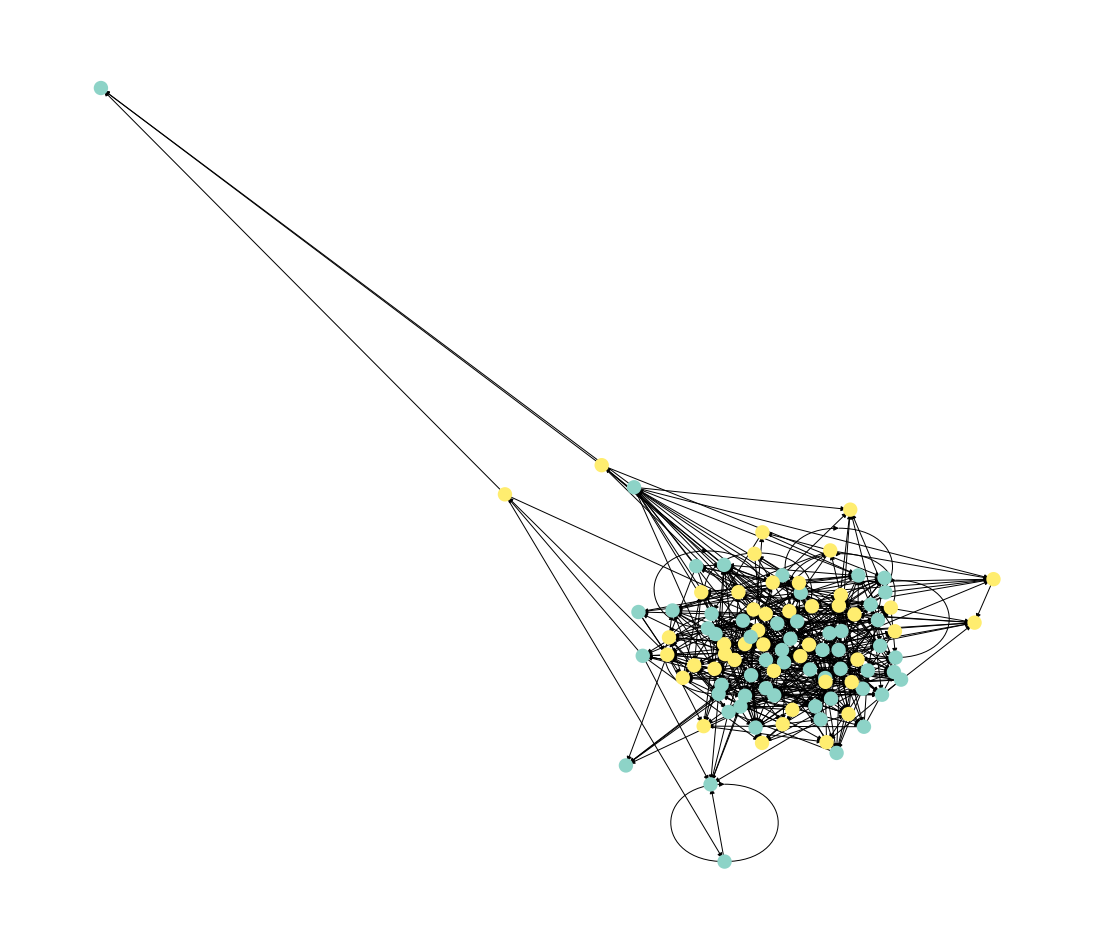

In [13]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1, figsize=(15,13))
nx.draw(vis, cmap=plt.get_cmap("Set3"), node_color=node_labels, node_size=70, linewidths=6)
plt.show()

Batch. Collection of objects.

In [14]:
graph2 = graph

In [15]:
batch = data.Batch().from_data_list([graph, graph2])

In [16]:
print("Number of graphs: ", batch.num_graphs)
print("Graph at index 1: ", batch[1])
print("Retrieve the list of graphs: ", len(batch.to_data_list()))

Number of graphs:  2
Graph at index 1:  Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:  2


Cluster

In [21]:
#cluster = data.ClusterData(graph, 5)
#clusterloader = data.ClusterLoader(cluster)

In [70]:
from torch_geometric.data import Data
training_data = Data(x=embeddings, y=ys, edge_index=edges_attr)
training_data

Data(x=[100, 16], edge_index=[500], y=[100])

In [76]:
import torch_geometric.transforms as T
from torch_geometric.loader import NeighborLoader
# training_data
# input_nodes = torch.ones(graph.num_nodes, dtype=torch.bool)
# kwargs = {'batch_size': 1024, 'num_workers': 6, 'persistent_workers': True}
# train_loader = NeighborLoader(training_data, num_neighbors=[10] * 2, shuffle=True, directed=True, input_nodes=input_nodes, **kwargs)

# # from torch_geometric.loader import NeighborLoader
# # sampler = NeighborLoader(data=graph, num_neighbors=embeddings, batch_size=1, input_nodes=node_labels)

Datasets

In [77]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'FakeDataset',
 'FakeHeteroDataset',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'OGB_MAG',
 'DBLP',
 'MovieLens',
 'IMDB',
 'LastFM',
 'HGBDataset',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airports',
 'B

In [79]:
name = "Cora"

transform = transforms.Compose([
    transforms.RandomNodeSplit("train_rest", num_val=500, num_test=500),
    transforms.TargetIndegree()
])
cora=datasets.Planetoid("./data", name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

Processing...
Done!


In [80]:
aids = datasets.TUDataset(root="./data", name="AIDS")

Extracting data\AIDS\AIDS.zip
Processing...
Done!


In [81]:
print("AIDS info:")
print("# of graphs: ", len(aids))
print("# Classes: ",aids.num_classes)
print("# Edge features: ", aids.num_edge_features)
print("# Edge labesl: ",aids.num_edge_labels)
print("# Node features: ", aids.num_node_features)

AIDS info:
# of graphs:  2000
# Classes:  2
# Edge features:  3
# Edge labesl:  3
# Node features:  38


In [83]:
print("Cora info:")
print("# of graphs: ", len(cora))
print("# Classes: ",cora.num_classes)
print("# Edge features: ", cora.num_edge_features)
print("# Node features: ", cora.num_node_features)

Cora info:
# of graphs:  1
# Classes:  7
# Edge features:  1
# Node features:  1433


In [84]:
aids.data

Data(x=[31385, 38], edge_index=[2, 64780], edge_attr=[64780, 3], y=[2000])

In [85]:
aids[0]

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])

In [86]:
cora.data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [87]:
cora[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1])

In [91]:
from torch_geometric.loader import DataLoader
cora_loader = DataLoader(cora)

In [92]:
for i in cora_loader:
    print(i)
    break

DataBatch(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1], batch=[2708], ptr=[2])


In [93]:
transforms.__all__

['BaseTransform',
 'Compose',
 'ToDevice',
 'ToSparseTensor',
 'ToUndirected',
 'Constant',
 'Distance',
 'Cartesian',
 'LocalCartesian',
 'Polar',
 'Spherical',
 'PointPairFeatures',
 'OneHotDegree',
 'TargetIndegree',
 'LocalDegreeProfile',
 'Center',
 'NormalizeRotation',
 'NormalizeScale',
 'RandomTranslate',
 'RandomFlip',
 'LinearTransformation',
 'RandomScale',
 'RandomRotate',
 'RandomShear',
 'NormalizeFeatures',
 'AddSelfLoops',
 'RemoveIsolatedNodes',
 'KNNGraph',
 'RadiusGraph',
 'FaceToEdge',
 'SamplePoints',
 'FixedPoints',
 'ToDense',
 'TwoHop',
 'LineGraph',
 'LaplacianLambdaMax',
 'GenerateMeshNormals',
 'Delaunay',
 'ToSLIC',
 'GDC',
 'SIGN',
 'GridSampling',
 'GCNNorm',
 'SVDFeatureReduction',
 'RemoveTrainingClasses',
 'RandomNodeSplit',
 'RandomLinkSplit',
 'AddMetaPaths',
 'LargestConnectedComponents',
 'VirtualNode']

In [109]:
raw_dir = "./data/AIDS/raw/"
# edges, graph_idx, graph_labels, node_attr

In [110]:
import os
import pandas as pd

In [115]:
path = os.path.join(raw_dir, "AIDS_node_attributes.txt")
node_attrs = pd.read_csv(path, sep=",", header=None)
node_attrs.index += 1

path = os.path.join(raw_dir, "AIDS_A.txt")
edge_index = pd.read_csv(path, sep=",", names=["source", "target"])
edge_index.index += 1

path = os.path.join(raw_dir, "AIDS_graph_indicator.txt")
graph_idx = pd.read_csv(path, sep=",", names=["idx"])
graph_idx.index += 1

path = os.path.join(raw_dir, "AIDS_graph_labels.txt")
graph_labels = pd.read_csv(path, sep=",", names=["label"])
graph_labels.index += 1

path = os.path.join(raw_dir, "AIDS_node_labels.txt")
node_labels = pd.read_csv(path, sep=",", names=["label"])
node_labels.index += 1




In [131]:
g_idx = 23

node_ids = graph_idx.loc[graph_idx["idx"]==g_idx].index

#Node features
attributes = node_attrs.loc[node_ids, :]
print(node_ids.shape)

#Edge info
edges = edge_index.loc[edge_index["source"].isin(node_ids)]
edges

# Graph label 
label = graph_labels.loc[g_idx]
label

print("Shape")
print("Nodes: ", node_ids.shape)
print("Attr: ", attributes.shape)
print("Edges: ", edges.shape)
print("Label: ", label.shape)



(9,)
Shape
Nodes:  (9,)
Attr:  (9, 4)
Edges:  (18, 2)
Label:  (1,)


In [132]:
print("Actual")
print("Nodes: ", node_ids)
print("Attr: ", attributes)
print("Edges: ", edges)
print("Label: ", label)

Actual
Nodes:  Int64Index([407, 408, 409, 410, 411, 412, 413, 414, 415], dtype='int64')
Attr:         0    1       2       3
407  1.0  0.0  3.7601  0.7694
408  1.0  0.0  4.6261  1.2694
409  4.0  0.0  3.7601 -0.2306
410  1.0  0.0  5.4921  1.7694
411  1.0  0.0  2.9511 -0.8184
412  4.0  0.0  4.5691 -0.8184
413  4.0  0.0  2.0000 -0.5093
414  4.0  0.0  3.2601 -1.7694
415  4.0  0.0  4.2601 -1.7694
Edges:       source  target
845     407     408
846     408     407
847     407     409
848     409     407
849     408     410
850     410     408
851     409     411
852     411     409
853     409     412
854     412     409
855     411     413
856     413     411
857     411     414
858     414     411
859     412     415
860     415     412
861     414     415
862     415     414
Label:  label    1
Name: 23, dtype: int64


In [136]:
edge_index = torch.tensor(edges.to_numpy().transpose(), dtype=torch.long)
map_dict = {v.item():i for i,v in enumerate(torch.unique(edge_index))}
map_edge = torch.zeros_like(edge_index)
for k,v in map_dict.items():
    map_edge[edge_index==k]=v

In [137]:
map_dict, map_edge, map_edge.shape

({407: 0, 408: 1, 409: 2, 410: 3, 411: 4, 412: 5, 413: 6, 414: 7, 415: 8},
 tensor([[0, 1, 0, 2, 1, 3, 2, 4, 2, 5, 4, 6, 4, 7, 5, 8, 7, 8],
         [1, 0, 2, 0, 3, 1, 4, 2, 5, 2, 6, 4, 7, 4, 8, 5, 8, 7]]),
 torch.Size([2, 18]))

In [154]:
attrs = torch.tensor(attributes.to_numpy(), dtype=torch.float)
pad = torch.zeros((attrs.shape[0], 4), dtype=torch.float)
x = torch.cat((attrs, pad), dim=-1)

edge_idx = map_edge.long()

np_lab = label.to_numpy()
y = torch.tensor(np_lab if np_lab[0] == 1 else [0], dtype=torch.long)

In [155]:
x.shape

torch.Size([9, 8])

In [156]:
graph = Data(x=x, edge_index=edge_idx,  y=y)

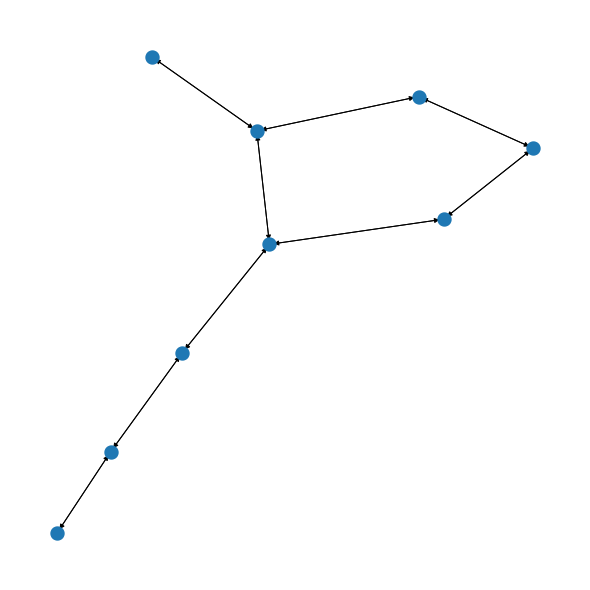

In [158]:
vis = to_networkx(graph)
plt.figure(1,figsize=(8,8)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=70,linewidths=6)
plt.show()

In [161]:
graph


Data(x=[9, 8], edge_index=[2, 18], y=[1])